In [3]:
import pandas as pd
# URL of the CSV file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
# Read the CSV file from the URL
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0.1  Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  \
0             0           0         Acer         4    2   1         5   
1             1           1         Dell         3    1   1         3   
2             2           2         Dell         3    1   1         7   
3             3           3         Dell         4    2   1         5   
4             4           4           HP         4    2   1         7   

   Screen_Size_inch  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  \
0              14.0       0.551724       8             256        3.52800   
1              15.6       0.689655       4             256        4.85100   
2              15.6       0.931034       8             256        4.85100   
3              13.3       0.551724       8             128        2.69010   
4              15.6       0.620690       8             256        4.21155   

   Price Price-binned  Screen-Full_HD  Screen-IPS_panel  
0    978          Low               0   

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
# Now to only use numeric data 
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
0,0,0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,0,1
1,1,1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,1,0
2,2,2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,1,0
3,3,3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,0,1
4,4,4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,1,0


In [6]:
#Now to remove columns unamed
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

# Let's take a look at the updated DataFrame
df.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,0,1
1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,1,0
2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,1,0
3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,0,1
4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,1,0


In [7]:
import pandas as pd

# Assuming df is your DataFrame
# Check the data types of all columns
data_types = df.dtypes

# Print data types of all columns
print("Data types of all columns:")
print(data_types)


Data types of all columns:
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object


In [12]:
# To use only numeric data 
df=df._get_numeric_data()
df.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,0,1
1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,1,0
2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,1,0
3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,0,1
4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,1,0


In [14]:
#Libraries for Plotting
from ipywidgets import interact, interactive, fixed, interact_manual

In [15]:
#Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [16]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [19]:
y_data = df['Price']

In [21]:
x_data=df.drop('Price',axis=1)

In [22]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 24
number of training samples: 214


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lre=LinearRegression()

In [25]:
lre.fit(x_train[['Weight_pounds']], y_train)

LinearRegression()

Comparing the r-Square with respect to to the train and test data 

In [26]:
lre.score(x_test[['Weight_pounds']], y_test)

0.001348229528713385

In [27]:
lre.score(x_train[['Weight_pounds']], y_train)

0.0004535063919588467

In [29]:
#Rsquare computation using 40% of dataset for testing 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['Weight_pounds']],y_train1)
lre.score(x_test1[['Weight_pounds']],y_test1)

-0.006537343679341001

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation. 40% of training dataset is not sufficient 

In [30]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("Weight_pounds"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.

In [33]:
Rcross = cross_val_score(lre, x_data[['Weight_pounds']], y_data, cv=4)

In [34]:
Rcross

array([-1.29904801, -0.16467317, -0.0208219 , -0.36665724])

In [37]:
#Computing the average and standard deviation of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.4628000804466452 and the standard deviation is 0.4981913305272189


# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

In [40]:
-1 * cross_val_score(lre,x_data[['Weight_pounds']], y_data,cv=4,scoring='neg_mean_squared_error')

array([292439.09259134, 449268.26775188, 375088.25521261, 396725.31096709])

# To compute the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature

In [42]:
Rc=cross_val_score(lre,x_data[['Weight_pounds']], y_data,cv=2)
Rc.mean()

-0.28909350351075647

# You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:

In [43]:
from sklearn.model_selection import cross_val_predict

# We input the object, the feature "weight_pounds", and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:

In [45]:
yhat = cross_val_predict(lre,x_data[['Weight_pounds']], y_data,cv=4)
yhat[0:5]

array([1555.02250291, 1573.73142888, 1573.73142888, 1543.17351646,
       1564.68878133])

In [46]:
# Overfitting, Underfitting and model selection 

In [47]:
lr = LinearRegression()
lr.fit(x_train[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']], y_train)

LinearRegression()

# Prediction using Train data 

In [48]:
yhat_train = lr.predict(x_train[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']])
yhat_train[0:5]

array([1394.20446867, 1287.72222478, 1688.42634369, 1360.13015062,
       1087.09423158])

# Prediction using Test Data

In [51]:
yhat_test = lr.predict(x_test[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']])
yhat_test[0:5]

array([1440.94616318, 1300.43129242, 1303.33962055, 1419.6497144 ,
       1337.41393859])

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

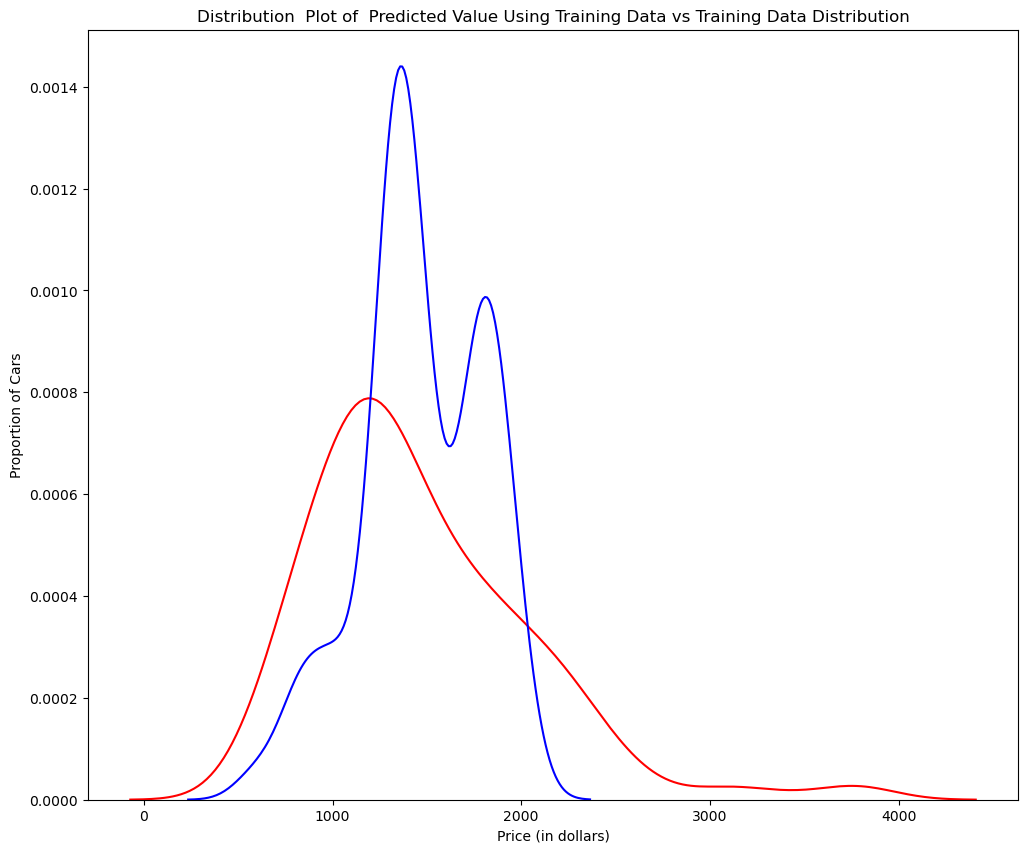

In [53]:
# Distribution of predicted values of training data 
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

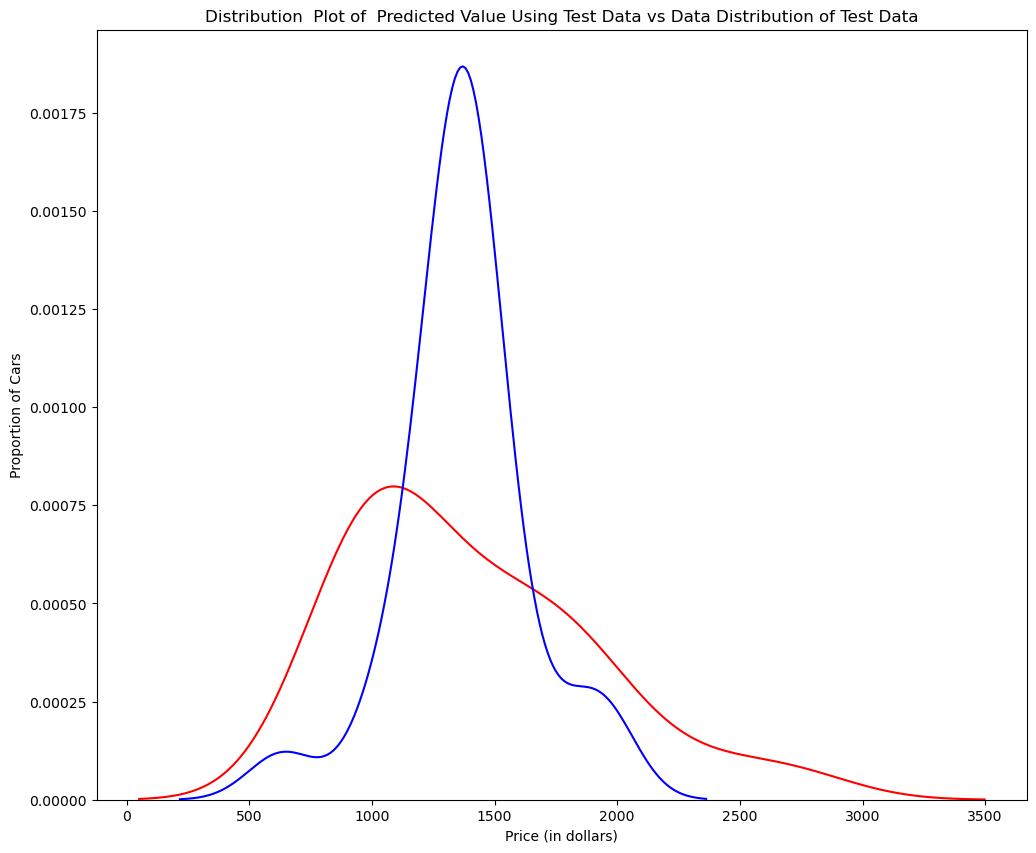

In [54]:
# Now of test data 
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

# Overfitting
Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

In [56]:
# Now to use 55% of data to train and rest for test 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [58]:
# Computing 5 degree polynomial function 
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['Weight_pounds']])
x_test_pr = pr.fit_transform(x_test[['Weight_pounds']])
pr

PolynomialFeatures(degree=5)

In [59]:
#  training the model
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [61]:
# predict first five values
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([1738.83062811, 1213.37396273, 1622.11247728, 1382.63702085,
       1210.38321307])

In [62]:
# Take the value and compare it to actual targets
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [1738.83062811 1213.37396273 1622.11247728 1382.63702085]
True values: [1904 1777 1905  761]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function

In [65]:
import numpy as np

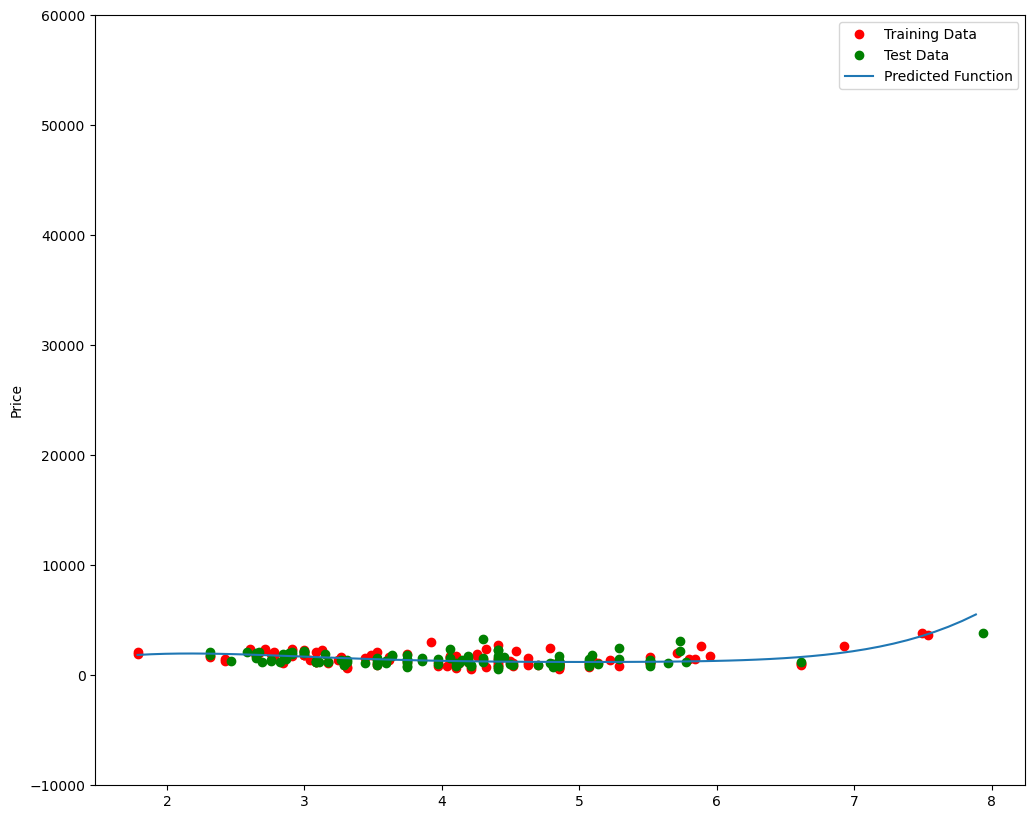

In [66]:
PollyPlot(x_train['Weight_pounds'], x_test['Weight_pounds'], y_train, y_test, poly,pr)

In [67]:
# r square of training data
poly.score(x_train_pr, y_train)

0.37260893663946437

In [68]:
# Now to see r square of test data 
poly.score(x_test_pr, y_test)

0.07851265179356093

We see the R^2 for the training data is 0.372608 while the R^2 on the test data was 0.07851. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

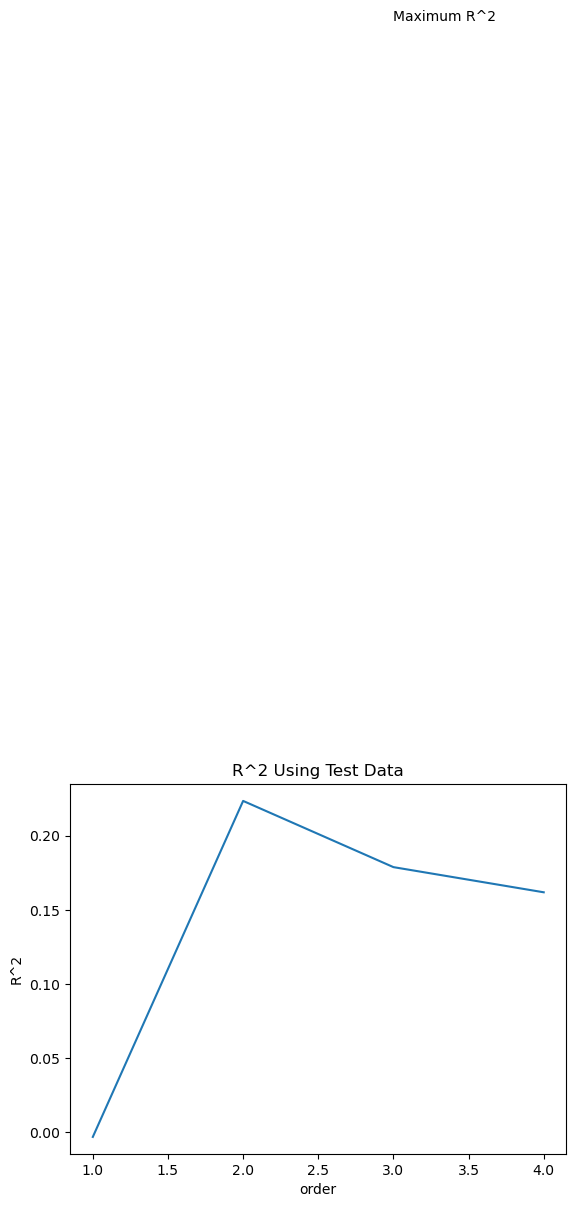

In [72]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Weight_pounds']])
    
    x_test_pr = pr.fit_transform(x_test[['Weight_pounds']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In this case the second order polynomial represents the best case scenario

In [74]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['Weight_pounds']])
    x_test_pr = pr.fit_transform(x_test[['Weight_pounds']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['Weight_pounds'], x_test['Weight_pounds'], y_train, y_test, poly,pr)

In [76]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [77]:
pr1=PolynomialFeatures(degree=2)

In [78]:
x_train_pr1=pr1.fit_transform(x_train[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']])

x_test_pr1=pr1.fit_transform(x_test[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']])

In [79]:
x_train_pr1.shape #there are now 15 features

(130, 15)

In [80]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

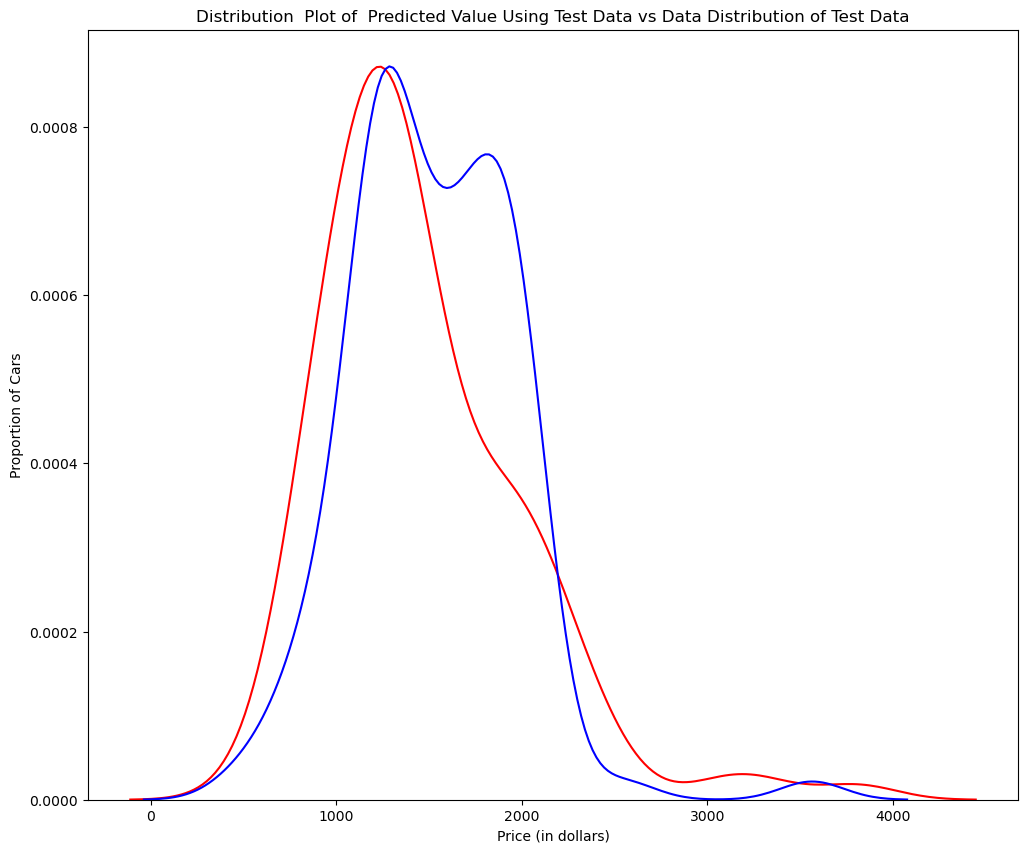

In [81]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [82]:
x_train_pr1=pr1.fit_transform(x_train[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']])

x_test_pr1=pr1.fit_transform(x_test[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']])

# Transform the training and test sample for the features

In [84]:
# How many dimensions does the new feature have? Hint: use the attribute "shape".
x_train_pr1.shape #there are now 15 features

(130, 15)

In [85]:
# Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features
poly1=LinearRegression().fit(x_train_pr1,y_train)

# Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.


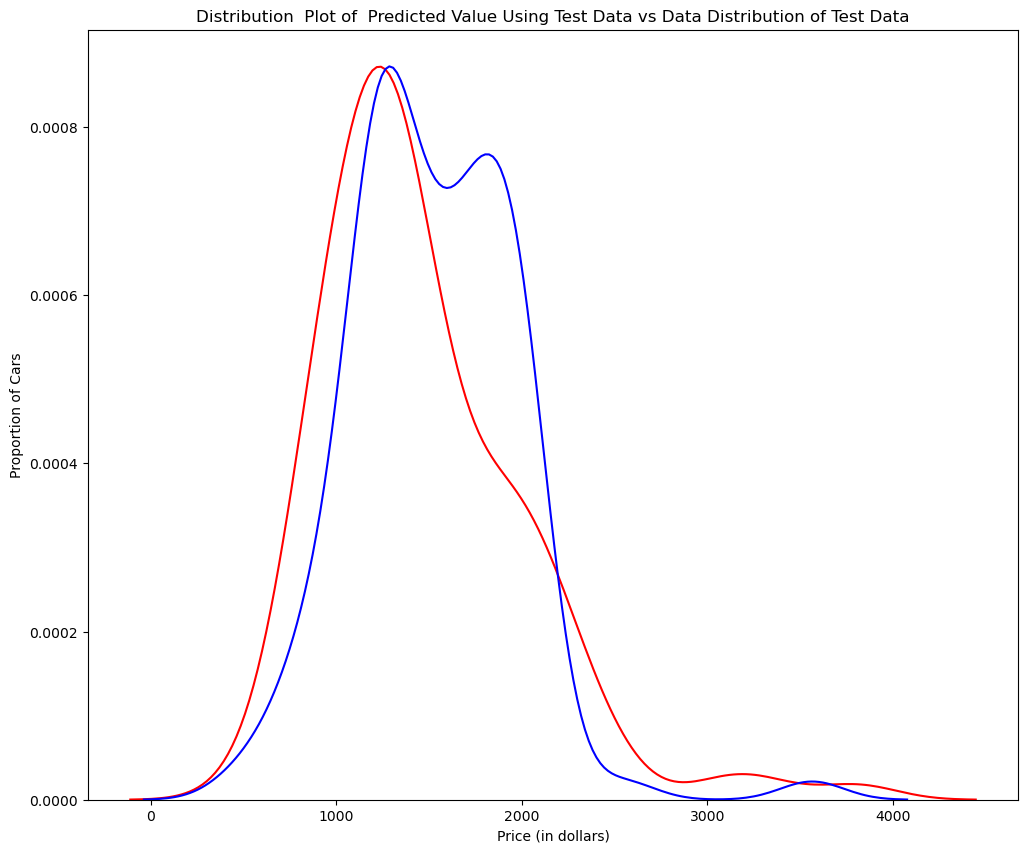

In [86]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

 Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.


In [88]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']])
x_test_pr=pr.fit_transform(x_test[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']])

In [89]:
from sklearn.linear_model import Ridge

#Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1

In [91]:
RigeModel=Ridge(alpha=1)

In [92]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [93]:
yhat = RigeModel.predict(x_test_pr)

In [94]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [1690.85406777 1624.70622796 1805.93720268  683.37599683]
test set : [1904 1777 1905  761]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [95]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:05<00:00, 166.69it/s, Test Score=0.184, Train Score=0.365]


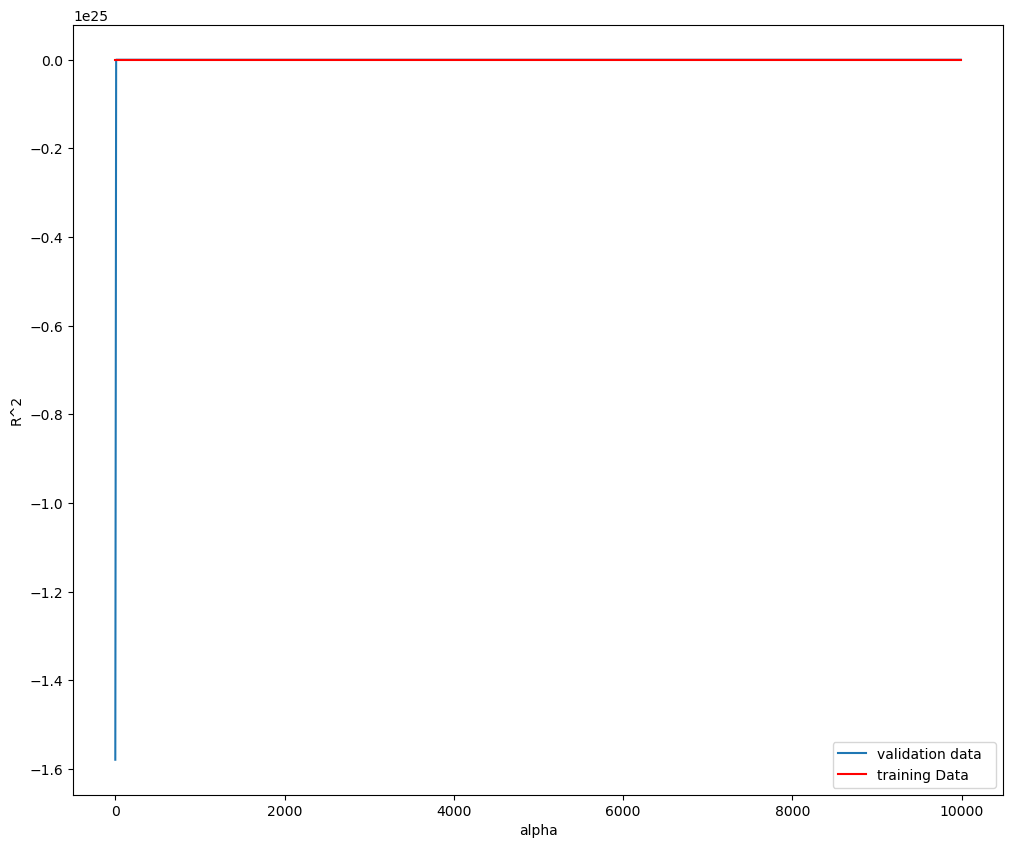

In [96]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [97]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.30105406012066716

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [100]:
RR=Ridge()
RR

Ridge()

In [101]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [102]:
Grid1.fit(x_data[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [103]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10)

In [105]:
BestRR.score(x_test[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']], y_test)

0.2032767854943789

In [107]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:

In [108]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['Weight_pounds', 'CPU_core', 'GPU', 'Storage_GB_SSD']], y_data)


Ridge(alpha=10)